#Get the data !


In [35]:
import zipfile


zip_ref=zipfile.ZipFile("Mydataset.zip")
zip_ref.extractall()
zip_ref.close()

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)
  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape:{img.shape}")
  return img

#Data preprocess


In [40]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
#Scalling / normalization (get all pixels values between 0 and 1)
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen= ImageDataGenerator(rescale=1./255)

#setup paths of our data

train_dir="/content/dataset/training"
valid_dir="/content/dataset/ "

#Import data into batches
train_data=train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data=valid_datagen.flow_from_directory(valid_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

Found 920 images belonging to 2 classes.
Found 173 images belonging to 2 classes.


#Build a CNN Model


In [41]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# Compile cnn

model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
model_1.summary()

#fit the model

history_1=model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data)) # len(train_data) is to sepecifiy batches ( if i dont use batches and want to train all the data once my computer memory will not fit)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                 

#Evaluating our model



<Axes: >

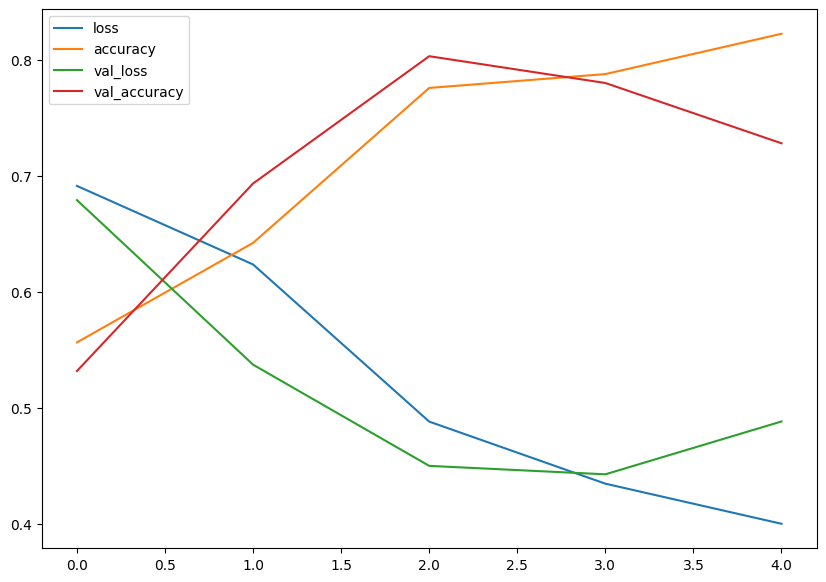

In [47]:
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(10,7))

In [50]:
def plot_loss_curves(history):
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs=range(len(history.history["loss"]))

  #plot loss

  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("loss")
  plt.xlabel('epochs')
  plt.legend()

  #plot accuracy
  plt.figure()
  plt.plot(epochs,accuracy,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel('epochs')
  plt.legend()

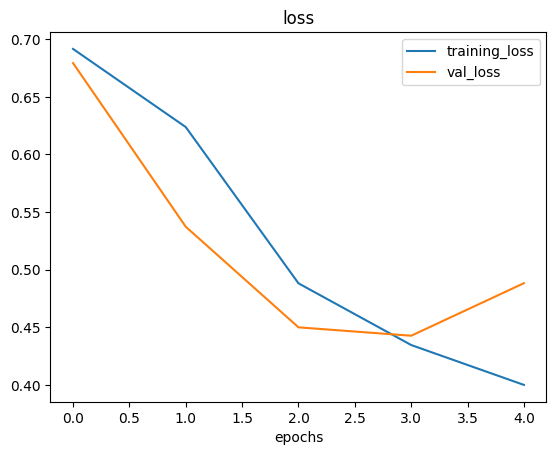

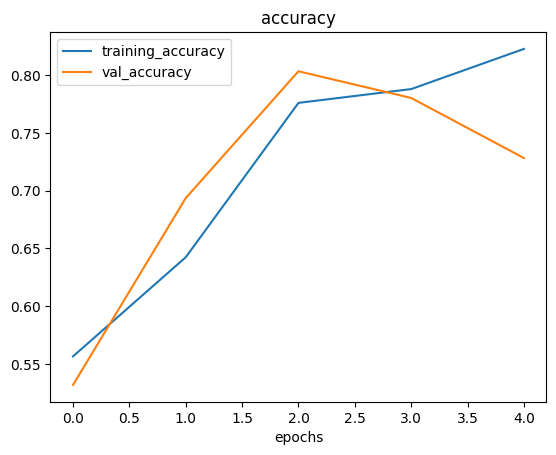

In [51]:
plot_loss_curves(history_1)


# validation loss increased ( risk of overfitting)


In [60]:
# create a model ( which will be the baseline)
model_2=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_2=model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
29/29 [==============================] - 3s 66ms/step - loss: 0.6932 - accuracy: 0.4978 - val_loss: 0.6583 - val_accuracy: 0.5723
Epoch 2/5
29/29 [==============================] - 2s 83ms/step - loss: 0.6090 - accuracy: 0.6989 - val_loss: 0.5104 - val_accuracy: 0.7630
Epoch 3/5
29/29 [==============================] - 2s 63ms/step - loss: 0.4712 - accuracy: 0.7837 - val_loss: 0.4524 - val_accuracy: 0.7514
Epoch 4/5
29/29 [==============================] - 3s 94ms/step - loss: 0.4621 - accuracy: 0.7750 - val_loss: 0.5712 - val_accuracy: 0.7399
Epoch 5/5
29/29 [==============================] - 2s 62ms/step - loss: 0.4445 - accuracy: 0.7978 - val_loss: 0.4669 - val_accuracy: 0.7514


# Visualising the new model

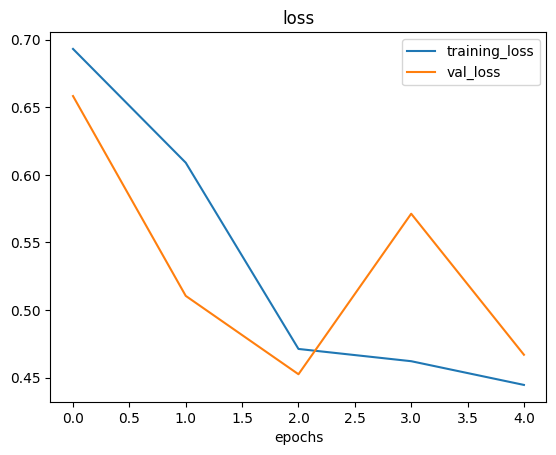

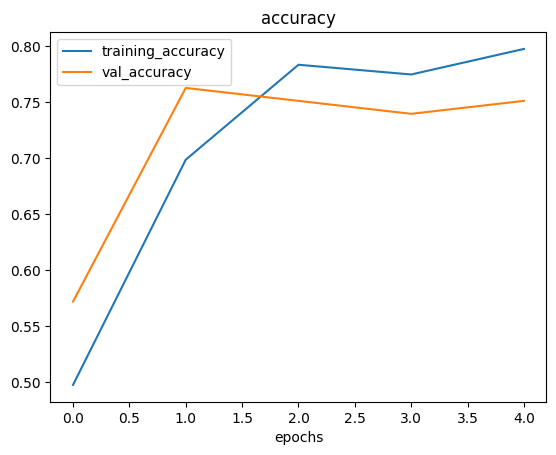

In [61]:
plot_loss_curves(history_2)

#Data Augmentation


In [66]:
 train_datagen_augmented= ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             horizontal_flip=True)
 train_datagen= ImageDataGenerator(rescale=1/255.)
 test_datagen= ImageDataGenerator(rescale=1/255.)

In [70]:
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224),class_mode="binary",shuffle=False)

Found 920 images belonging to 2 classes.


#create another model and train with the augmented data



In [71]:
model_2=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_2=model_2.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
29/29 [==============================] - 15s 409ms/step - loss: 0.7818 - accuracy: 0.4370 - val_loss: 0.7027 - val_accuracy: 0.4740
Epoch 2/5
29/29 [==============================] - 12s 417ms/step - loss: 0.6931 - accuracy: 0.5141 - val_loss: 0.6758 - val_accuracy: 0.5260
Epoch 3/5
29/29 [==============================] - 13s 453ms/step - loss: 0.6983 - accuracy: 0.4261 - val_loss: 0.6891 - val_accuracy: 0.5260
Epoch 4/5
29/29 [==============================] - 12s 387ms/step - loss: 0.6899 - accuracy: 0.5457 - val_loss: 0.6816 - val_accuracy: 0.5260
Epoch 5/5
29/29 [==============================] - 12s 429ms/step - loss: 0.6974 - accuracy: 0.5109 - val_loss: 0.6826 - val_accuracy: 0.5260


In [73]:
# shuffle augmeneted data to get a better fitting
train_datagen_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="binary",shuffle=True)

Found 920 images belonging to 2 classes.


In [74]:
model_2=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(10,3,activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history_2=model_2.fit(train_datagen_augmented_shuffled,epochs=5,steps_per_epoch=len(train_datagen_augmented_shuffled),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
29/29 [==============================] - 13s 365ms/step - loss: 0.6760 - accuracy: 0.5913 - val_loss: 0.5928 - val_accuracy: 0.7052
Epoch 2/5
29/29 [==============================] - 11s 385ms/step - loss: 0.5746 - accuracy: 0.7065 - val_loss: 0.6607 - val_accuracy: 0.6590
Epoch 3/5
29/29 [==============================] - 12s 414ms/step - loss: 0.5381 - accuracy: 0.7413 - val_loss: 0.4732 - val_accuracy: 0.7399
Epoch 4/5
29/29 [==============================] - 12s 413ms/step - loss: 0.5024 - accuracy: 0.7685 - val_loss: 0.4802 - val_accuracy: 0.8150
Epoch 5/5
29/29 [==============================] - 12s 422ms/step - loss: 0.4766 - accuracy: 0.7663 - val_loss: 0.4949 - val_accuracy: 0.8092


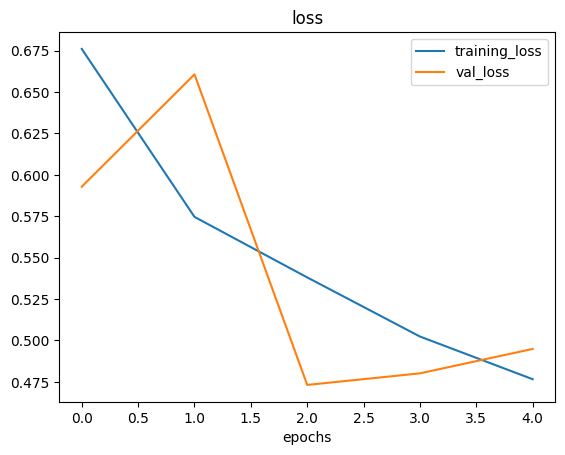

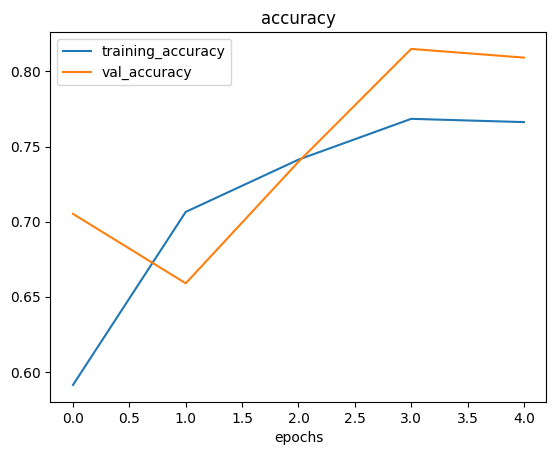

In [75]:
plot_loss_curves(history_2)

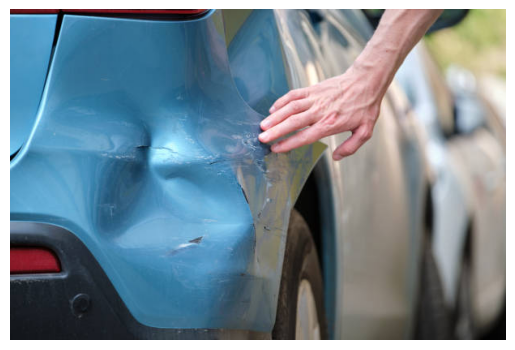

In [85]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
minor=mpimg.imread("/content/istockphoto-1371062685-612x612.jpg")
plt.imshow(minor)
plt.axis(False);
minor

def load_and_prep_image(filename,img_shape=224):
  #import the image
  img=tf.io.read_file(filename)
  #decode the image
  img=tf.image.decode_image(img)
  #resize the image
  img=tf.image.resize(img,size=[img_shape,img_shape])
  #Rescale the image
  img=img/255.
  return img

1/1 [==============================] - 0s 17ms/step


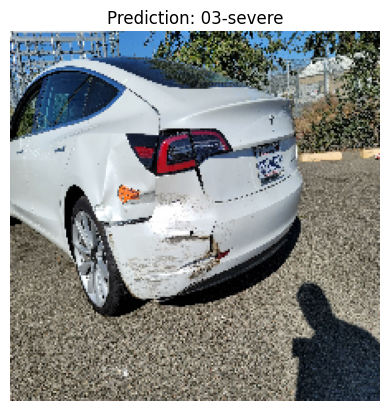

In [103]:

import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
def pred_and_plot(model, filename, class_names):

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred)[0][0])]


  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

pred_and_plot(model_2,"/content/ozfqjpweks981.jpg",class_names)